In [1]:
#based on
#https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/
#https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line

In [4]:
DATA_DIR = "/home/ubuntu/fastai/data/"

In [13]:
# load and plot dataset
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

from math import sqrt

from sklearn.metrics import mean_squared_error

In [3]:
# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')


In [6]:
series = read_csv(DATA_DIR+'shampoo_sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# summarize first few rows
print(series.head())
print (series.shape)

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64
(36,)


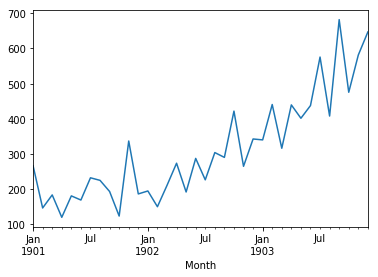

In [7]:
# line plot
series.plot()
pyplot.show()

In [36]:
# split data into train and test
X = series.values
train, test = X[0:-12], X[-12:]
print ("train:", type(train), train.shape)
print ("test:", test.shape)

train: <class 'numpy.ndarray'> (24,)
test: (12,)


In [37]:
# walk-forward validation
history = [x for x in train]
print (type(history), len(history))

<class 'list'> 24


In [38]:
print (history[0:5])
print (train[0:5])

[266.0, 145.90000000000001, 183.09999999999999, 119.3, 180.30000000000001]
[ 266.   145.9  183.1  119.3  180.3]


In [39]:
predictions = list()
predictions2 = list()

print ("predictions:", predictions)
for i in range(len(test)):
    # make prediction
    predictions.append(history[-1])
    # observation
    history.append(test[i])
    predictions2.append(history[-1])
print ("history:", len(history))
print ("predictions:", len(predictions))
#history = list contents of train + contents of test.
#predictions = contents of test lag by one time period.

predictions: []
history: 36
predictions: 12


In [35]:
print ("history:", history[0:5])
print ("predictions:", predictions[0:5])


history: [266.0, 145.90000000000001, 183.09999999999999, 119.3, 180.30000000000001]
predictions: [342.30000000000001, 339.69999999999999, 440.39999999999998, 315.89999999999998, 439.30000000000001]


In [19]:
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 136.761


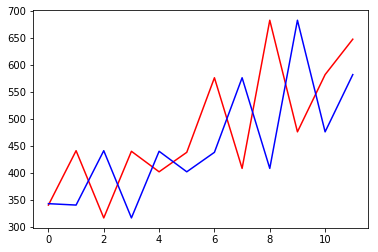

In [41]:
# line plot of observed vs predicted
pyplot.plot(test, color='red')
pyplot.plot(predictions, color='blue')
pyplot.show()

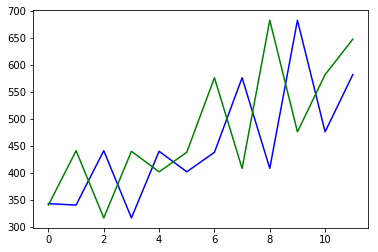

In [42]:
# line plot of observed vs predicted
#pyplot.plot(test, color='red')
pyplot.plot(predictions, color='blue')
pyplot.plot(predictions2, color='green')
pyplot.show()
